# Phase plane analysis for Stommel's model

This code will do numerical continuation and ressembles the code in lecture13_EBM.ipynb

The solution converged.
f1* =  [-1.0679098]
The solution converged.
f2* =  [-0.30702689]
The solution converged.
f3* =  [0.21909034]


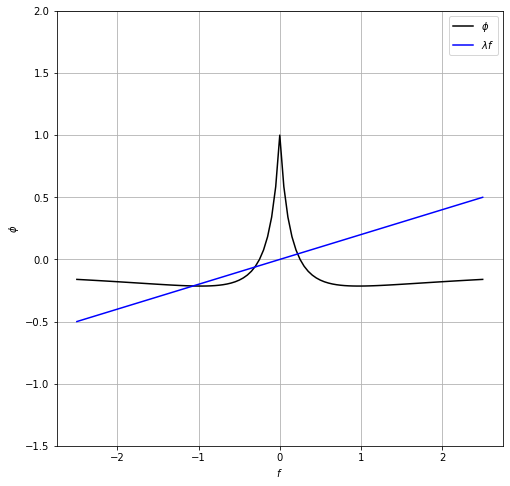

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root

delt = 1/6
R = 2
lam = 0.2
    
def phi(f):
    phi = delt*R/(delt + np.abs(f)) - 1/(1 + np.abs(f))
    return phi

# Define the function that provides the fixed points
def eq(f):
    eq = phi(f) - lam*f
    return eq

# Let's attempt to find the three roots
fguess1 = -1.5;
fguess2 = -0.5;
fguess3 = 0.5;
fwd = lambda f: eq(f)
sol = root(fwd, fguess1)
f1 = sol.x
print(sol.message)
print("f1* = ", f1)

sol = root(fwd, fguess2)
f2 = sol.x
print(sol.message)
print("f2* = ", f2)

sol = root(fwd, fguess3)
f3 = sol.x
print(sol.message)
print("f3* = ", f3)


fmat = np.linspace(-2.5, 2.5, 101)
fig = plt.figure(figsize=(8, 8))
plt.plot(fmat, phi(fmat), 'k', label='$\phi$')
plt.plot(fmat, lam*fmat, 'b', label='$\lambda f$' )
plt.ylim((-1.5,2))
plt.xlabel("$f$"); plt.ylabel("$\phi$"); plt.legend(); plt.grid(1)

## Studying the linear matrix A

In your notes, the formula is given for linear matrix A. Once the steady states are known, A can be computed and subsequently its eigenvalues studied. In the below code, the matrix A is prescribed and we use Numpy's eigenvalue routine to extrac the eigenvalues. 

In practice, it is possible to do this entirely by hand (it is only a 2x2 matrix) but here we do it computationally for ease of presentation.

In [2]:
# Once the fixed points are known for f, we can solve for the fixed points in (x, y)
def xsys(f):
    xs = delt/(delt + np.abs(f))
    ys = 1/(1 + np.abs(f))
    return np.array([xs, ys])

# It is helpful for the stability to also construct the linear matrix
def Amat(f):
    # Get the steady states
    [xs, ys] = xsys(f);
    
    if f >= 0: 
        c = 1
    else: 
        c = -1
    
    A1 = -(delt + np.abs(f)) - c*R*xs/lam; 
    A2 = c*xs/lam; 
    A3 = -c*R*ys/lam; 
    A4 = -(1 + np.abs(f)) + c*ys/lam; 
    # Flatten to scalars
    A1 = A1[0]; A2 = A2[0]; A3 = A3[0]; A4 = A4[0];
    A = np.array([[A1, A2],[A3, A4]])
    return A

# Now do a load of printing to get all the eigenvalues
print(f'Stability analysis for f = {f1[0]:.2f}') 
xyval = xsys(f1); xs1 = xyval[0]; ys1 = xyval[1];
print(f'(x, y) = {xs1[0]:.2f}, {ys1[0]:.2f}') 
eigs = np.linalg.eigvals(Amat(f1))
print(f'Eigenvalues =  {eigs[0]:.2f}, {eigs[1]:.2f}')
print('---------------------------------') 
print(f'Stability analysis for f = {f2[0]:.2f}') 
xyval = xsys(f2); xs2 = xyval[0]; ys2 = xyval[1];
print(f'(x, y) = {xs2[0]:.2f}, {ys2[0]:.2f}') 
eigs = np.linalg.eigvals(Amat(f2))
print(f'Eigenvalues =  {eigs[0]:.2f}, {eigs[1]:.2f}')
print('---------------------------------') 
print(f'Stability analysis for f = {f3[0]:.2f}') 
xyval = xsys(f3); xs3 = xyval[0]; ys3 = xyval[1];
print(f'(x, y) = {xs3[0]:.2f}, {ys3[0]:.2f}') 
eigs = np.linalg.eigvals(Amat(f3))
print(f'Eigenvalues =  {eigs[0]:.2f}, {eigs[1]:.2f}')

Stability analysis for f = -1.07
(x, y) = 0.13, 0.48
Eigenvalues =  -0.76, -3.61
---------------------------------
Stability analysis for f = -0.31
(x, y) = 0.35, 0.77
Eigenvalues =  0.76, -2.85
---------------------------------
Stability analysis for f = 0.22
(x, y) = 0.43, 0.82
Eigenvalues =  -0.91+1.82j, -0.91-1.82j


## Plotting

We now have obtained all the critical points. We can plot the results in the (x, y) plane.

The key is that for each of the (up to three) steady states, the stability can be studied. If there are three critical points corresponding to (f1, f2, f3), then we find that f1 is a stable node, f2 is an unstable saddle point, and f4 is a stable spiral point. Without doing the eigenvalue analysis, this is quite difficult to see just from the phase plane diagram as you might agree below.

Text(0, 0.5, 'Temperature')

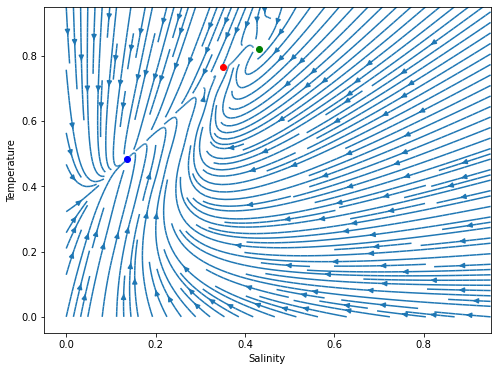

In [62]:
xx, yy = np.meshgrid(np.arange(0, 1, 0.05), np.arange(0, 1, 0.05))
f = (R*xx-yy)/lam
xdot = delt*(1 - xx)- np.abs(f)*xx
ydot = 1 - yy - np.abs(f)*yy
fig = plt.figure(figsize=(8, 6))
plt.streamplot(xx,yy,xdot,ydot, density=2)
plt.plot(xs1, ys1, 'bo')
plt.plot(xs2, ys2, 'ro')
plt.plot(xs3, ys3, 'go')
plt.xlabel('Salinity')
plt.ylabel('Temperature')